<a href="https://colab.research.google.com/github/AuliaVirza101/PCVK/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBJECT DETECTION

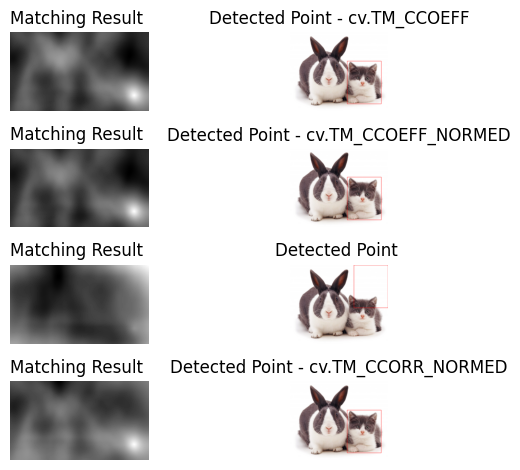

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Membaca gambar utama dan template
img = cv.imread('drive/MyDrive/PCVK_2024/Cat_and_Bunny.jpg')
template = cv.imread('drive/MyDrive/PCVK_2024/Cat_Template.jpg')

# Konversi gambar utama dan template ke skala abu-abu
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
templ_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# Mendapatkan ukuran template
w, h = templ_gray.shape[::-1]

# Template Matching dengan metode cv.TM_CCOEFF
res1 = cv.matchTemplate(img_gray, templ_gray, cv.TM_CCOEFF)
min_val1, max_val1, min_loc1, max_loc1 = cv.minMaxLoc(res1)
top_left1 = max_loc1
bottom_right1 = (top_left1[0] + w, top_left1[1] + h)
img_result1 = img.copy()
cv.rectangle(img_result1, top_left1, bottom_right1, (0, 0, 255), 2)

# Template Matching dengan metode cv.TM_CCOEFF_NORMED
res2 = cv.matchTemplate(img_gray, templ_gray, cv.TM_CCOEFF_NORMED)
min_val2, max_val2, min_loc2, max_loc2 = cv.minMaxLoc(res2)
top_left2 = max_loc2
bottom_right2 = (top_left2[0] + w, top_left2[1] + h)
img_result2 = img.copy()
cv.rectangle(img_result2, top_left2, bottom_right2, (0, 0, 255), 2)

# Template Matching dengan metode cv.TM_CCORR
res3 = cv.matchTemplate(img_gray, templ_gray, cv.TM_CCORR)
min_val3, max_val3, min_loc3, max_loc3 = cv.minMaxLoc(res3)
top_left3 = max_loc3
bottom_right3 = (top_left3[0] + w, top_left3[1] + h)
img_result3 = img.copy()
cv.rectangle(img_result3, top_left3, bottom_right3, (0, 0, 255), 2)

# Template Matching dengan metode cv.TM_CCORR_NORMED
res4 = cv.matchTemplate(img_gray, templ_gray, cv.TM_CCORR_NORMED)
min_val4, max_val4, min_loc4, max_loc4 = cv.minMaxLoc(res4)
top_left4 = max_loc4
bottom_right4 = (top_left4[0] + w, top_left4[1] + h)
img_result4 = img.copy()
cv.rectangle(img_result4, top_left4, bottom_right4, (0, 0, 255), 2)


# Menampilkan hasil untuk setiap metode
plt.subplot(4, 2, 1), plt.imshow(res1, cmap='gray')
plt.title('Matching Result ')
plt.axis('off')
plt.subplot(4, 2, 2), plt.imshow(cv.cvtColor(img_result1, cv.COLOR_BGR2RGB))
plt.title('Detected Point - cv.TM_CCOEFF')
plt.axis('off')

plt.subplot(4, 2, 3), plt.imshow(res2, cmap='gray')
plt.title('Matching Result ')
plt.axis('off')
plt.subplot(4, 2, 4), plt.imshow(cv.cvtColor(img_result2, cv.COLOR_BGR2RGB))
plt.title('Detected Point - cv.TM_CCOEFF_NORMED')
plt.axis('off')

plt.subplot(4, 2, 5), plt.imshow(res3, cmap='gray')
plt.title('Matching Result ')
plt.axis('off')
plt.subplot(4, 2, 6), plt.imshow(cv.cvtColor(img_result3, cv.COLOR_BGR2RGB))
plt.title('Detected Point ')
plt.axis('off')

plt.subplot(4, 2, 7), plt.imshow(res4, cmap='gray')
plt.title('Matching Result ')
plt.axis('off')
plt.subplot(4, 2, 8), plt.imshow(cv.cvtColor(img_result4, cv.COLOR_BGR2RGB))
plt.title('Detected Point - cv.TM_CCORR_NORMED')
plt.axis('off')

plt.tight_layout()
plt.show()


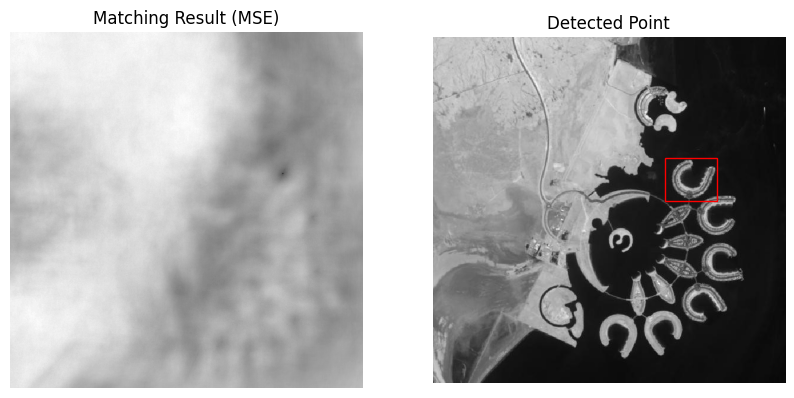

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image and template using cv2
img = cv2.imread('drive/MyDrive/PCVK_2024/bahrain.jpg', cv2.IMREAD_GRAYSCALE)  # Read as grayscale
template = cv2.imread('drive/MyDrive/PCVK_2024/bahrain-template.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the size of the template
template_height, template_width = template.shape

# Calculate the result size (smaller than the original image)
img_height, img_width = img.shape
match_result = np.zeros((img_height - template_height + 1, img_width - template_width + 1))

# Looping for each position in the input image
for y in range(img_height - template_height + 1):
  for x in range(img_width - template_width + 1):
    # Extract patch from the input image
    patch = img[y:y + template_height, x:x + template_width]

    # Calculate Mean Squared Error between patch and template
    mse = np.mean((patch - template) ** 2)
    match_result[y, x] = mse

# Find location with the minimum MSE (best match)
min_mse_loc = np.unravel_index(np.argmin(match_result), match_result.shape)
y, x = min_mse_loc

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display matching result
ax1.imshow(match_result, cmap='gray')
ax1.set_title("Matching Result (MSE)")
ax1.axis('off')

# Display input image with detection rectangle
ax2.imshow(img, cmap='gray')
rect = plt.Rectangle((x, y), template_width, template_height, edgecolor='r', facecolor='none')
ax2.add_patch(rect)
ax2.set_title("Detected Point")
ax2.axis('off')

plt.show()

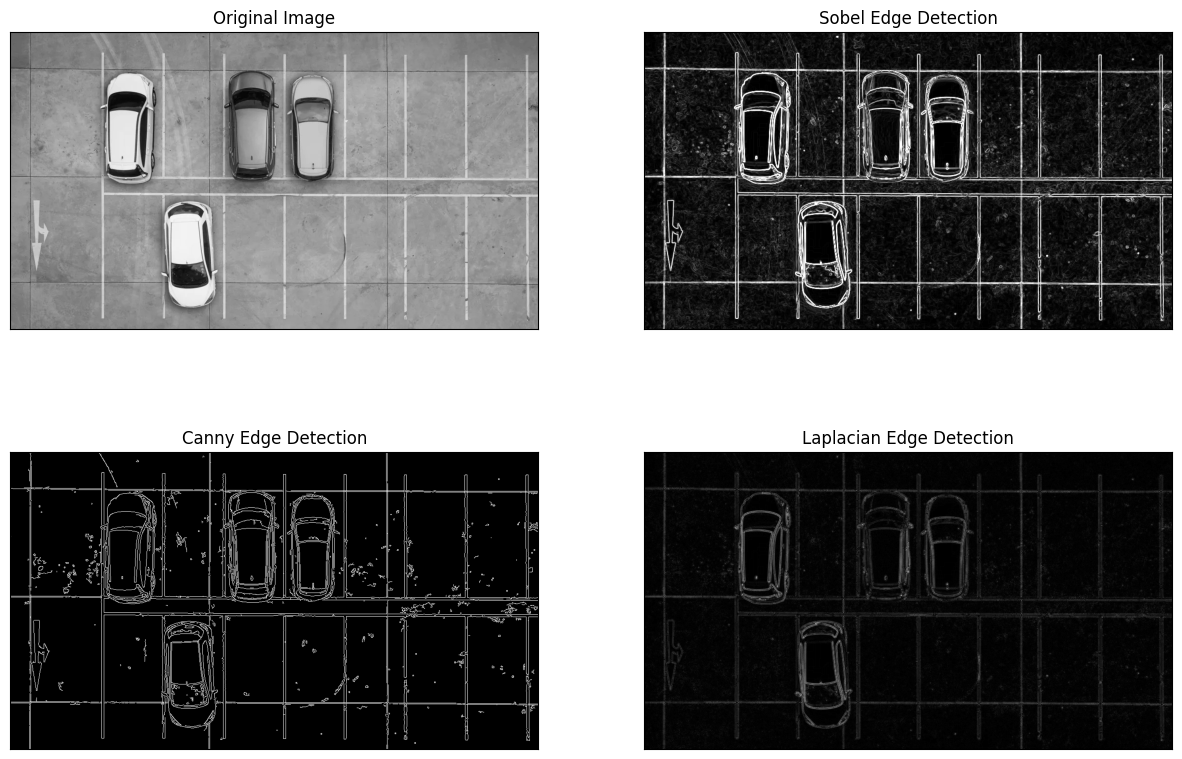

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv2.imread('drive/MyDrive/PCVK_2024/car-park.jpg', 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Smaller kernel size for less noise
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)  # Convert to uint8 for display

# Canny Edge Detection
# Experiment with thresholds
edges = cv2.Canny(img, 50, 150)  # Lower the thresholds for finer edges

# Laplacian Edge Detection
# Apply GaussianBlur before Laplacian to reduce noise
blurred_img = cv2.GaussianBlur(img, (3, 3), 0)
laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)  # Convert to uint8 for display

# Visualisasi
plt.figure(figsize=(15,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()


<ipython-input-17-f4102db3e37f>:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners_shi_tomasi = np.int0(corners_shi_tomasi)  # Mengubah koordinat ke tipe integer


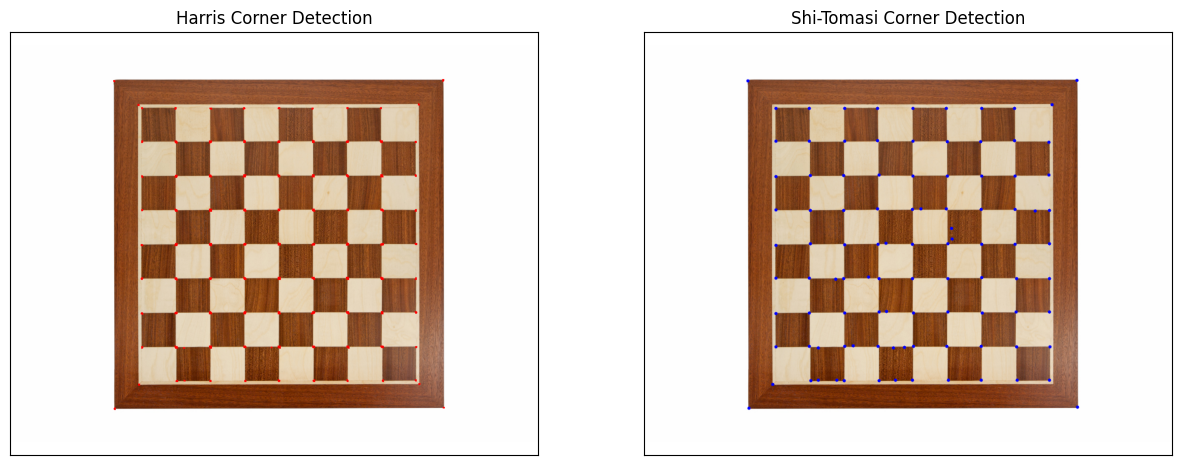

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img_chess = cv.imread('drive/MyDrive/PCVK_2024/chess-board.jpg')
gray = cv.cvtColor(img_chess, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
gray = np.float32(gray)  # Mengubah gambar menjadi tipe float32
dst_harris = cv.cornerHarris(gray, 2, 3, 0.04)

# Menandai sudut pada gambar
dst_harris = cv.dilate(dst_harris, None)  # Memperbesar titik sudut agar lebih terlihat
img_harris = img_chess.copy()
img_harris[dst_harris > 0.01 * dst_harris.max()] = [0, 0, 255]  # Menandai sudut dengan warna merah

# Shi-Tomasi Corner Detection
corners_shi_tomasi = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)  # Menemukan 100 sudut terbaik dengan threshold 0.01
corners_shi_tomasi = np.int0(corners_shi_tomasi)  # Mengubah koordinat ke tipe integer

# Menandai sudut Shi-Tomasi pada gambar
img_shi_tomasi = img_chess.copy()
for corner in corners_shi_tomasi:
    x, y = corner.ravel()
    cv.circle(img_shi_tomasi, (x, y), 3, 255, -1)  # Menandai sudut dengan lingkaran

# Menampilkan hasil
plt.figure(figsize=(15,10))

# Gambar Harris Corner Detection
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_harris, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.xticks([]), plt.yticks([])

# Gambar Shi-Tomasi Corner Detection
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.xticks([]), plt.yticks([])

plt.show()


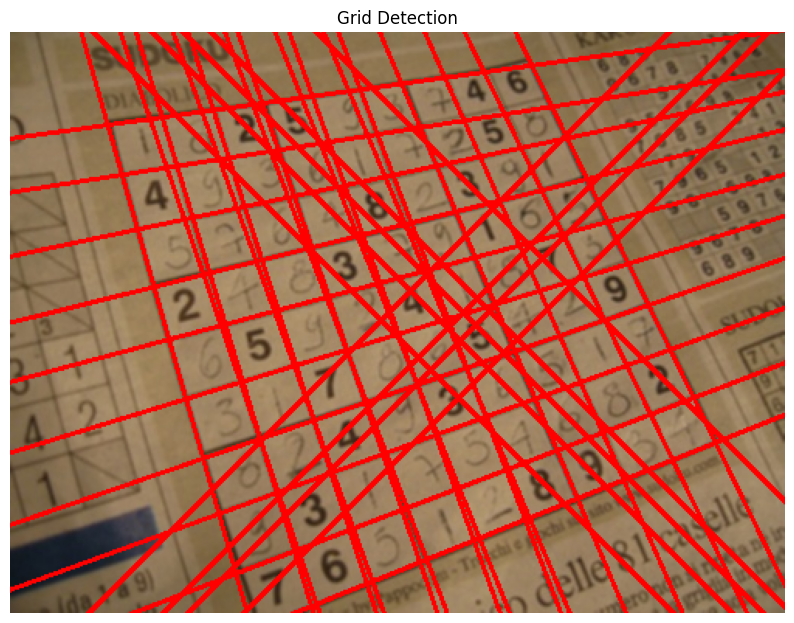

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('drive/MyDrive/PCVK_2024/sudoku.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Dilate the edges
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)

# Erode the dilated edges
eroded = cv2.erode(dilated, kernel, iterations=1)

# Apply Hough Transform to detect lines
lines = cv2.HoughLines(eroded, 1, np.pi/180, 200)

# Combine similar lines
combined_lines = []
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Check if the line is similar to any existing line
    similar = False
    for cl in combined_lines:
        if abs(cl[0] - rho) < 10 and abs(cl[1] - theta) < 0.1:
            similar = True
            break

    if not similar:
        combined_lines.append([rho, theta])
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the resulting image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Grid Detection')
plt.show()

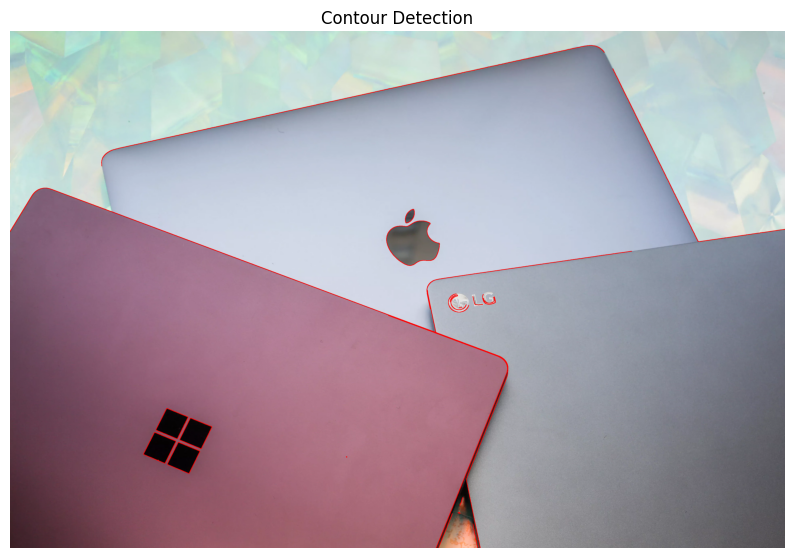

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('drive/MyDrive/PCVK_2024/laptop.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw in red with thickness of 2

# Display the resulting image with contours
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Contour Detection')
plt.show()
